# Import All Libraries needed


In [ ]:
import time
from google.colab import drive

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import Adam, Adamax

import numpy as np
from google.colab import files

from tensorflow.keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import preprocess_input


# Mount to Google Drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1hMuDgvtpzym6CqARviPEekGIXePALmsz/dogs breed


In [ ]:
%cd /content/gdrive/My Drive/dogs breed/
!ls

/content/gdrive/.shortcut-targets-by-id/1hMuDgvtpzym6CqARviPEekGIXePALmsz/dogs breed
'beage (10).jpg'	    'gs (7).jpg'	      'maltesew (15).jfif'
'beage (11).jpg'	    'gs (8).jpg'	      'maltesew (16).jfif'
'beage (12).jpg'	    'gs (9).jpg'	      'maltesew (17).jfif'
'beage (13).jpg'	     gs.jpg		      'maltesew (18).jfif'
'beage (14).jpg'	    'gss (10).jpg'	      'maltesew (19).jfif'
'beage (15).jpg'	    'gss (11).jpg'	      'maltesew (1).jfif'
'beage (16).jpg'	    'gss (12).jpg'	      'maltesew (20).jfif'
'beage (17).jpg'	    'gss (13).jpg'	      'maltesew (2).jfif'
'beage (18).jpg'	    'gss (14).jpg'	      'maltesew (3).jfif'
'beage (19).jpg'	    'gss (15).jpg'	      'maltesew (4).jfif'
'beage (1).jpg'		    'gss (16).jpg'	      'maltesew (5).jfif'
'beage (20).jpg'	    'gss (17).jpg'	      'maltesew (6).jfif'
'beage (21).jpg'	    'gss (18).jpg'	      'maltesew (7).jfif'
'beage (22).jpg'	    'gss (19).jpg'	      'maltesew (8).jfif'
'beage (2).jpg'		    'gss (1).jpg'	      'maltesew (9

# Check the data

In [ ]:
import os

dir_beagle = os.path.join('train/beagle')
dir_bull_mastiff = os.path.join('train/bull_mastiff')
dir_chihuahua = os.path.join('train/chihuahua')
#dir_doberman = os.path.join('train/doberman')
dir_german_shepherd = os.path.join('train/german_shepherd')
dir_golden_retriever = os.path.join('train/golden_retriever')
#dir_malinois = os.path.join('train/malinois')
dir_maltese = os.path.join('train/maltese')
dir_pomeranian = os.path.join('train/pomeranian')
dir_pug = os.path.join('train/pug')
dir_shih_tzu = os.path.join('train/shih_tzu')
dir_siberian_husky = os.path.join('train/siberian_husky')

print("Data Training: ")
print('total gambar Beagle pada data training:', len(os.listdir(dir_beagle)))
print('total gambar Bull Mastiff pada data training:', len(os.listdir(dir_bull_mastiff)))
print('total gambar Chihuahua pada data training:', len(os.listdir(dir_chihuahua)))
#print('total gambar Doberman pada data training:', len(os.listdir(dir_doberman)))
print('total gambar German Stepherd pada data training:', len(os.listdir(dir_german_shepherd)))
print('total gambar Golden Retriever pada data training:', len(os.listdir(dir_golden_retriever)))
#print('total gambar Malinois pada data training:', len(os.listdir(dir_malinois)))
print('total gambar Maltese pada data training:', len(os.listdir(dir_maltese)))
print('total gambar Pomeranian pada data training:', len(os.listdir(dir_pomeranian)))
print('total gambar Pug pada data training:', len(os.listdir(dir_pug)))
print('total gambar Shih Tzu pada data training:', len(os.listdir(dir_shih_tzu)))
print('total gambar Siberian Husky pada data training:', len(os.listdir(dir_siberian_husky)))


dir_beagle_test = os.path.join('test/beagle')
dir_bull_mastiff_test = os.path.join('test/bull_mastiff')
dir_chihuahua_test = os.path.join('test/chihuahua')
#dir_doberman_test = os.path.join('test/doberman')
dir_german_shepherd_test = os.path.join('test/german_shepherd')
dir_golden_retriever_test = os.path.join('test/golden_retriever')
#dir_malinois_test = os.path.join('test/malinois')
dir_maltese_test = os.path.join('test/maltese')
dir_pomeranian_test = os.path.join('test/pomeranian')
dir_pug_test = os.path.join('test/pug')
dir_shih_tzu_test = os.path.join('test/shih_tzu')
dir_siberian_husky_test = os.path.join('test/siberian_husky')


print("\nData Testing:")
print('total gambar Beagle pada data testing:', len(os.listdir(dir_beagle_test)))
print('total gambar Bull Mastiff pada data testing:', len(os.listdir(dir_bull_mastiff_test)))
print('total gambar Chihuahua pada data testing:', len(os.listdir(dir_chihuahua_test)))
#print('total gambar Doberman pada data testing:', len(os.listdir(dir_chihuahua_test)))
print('total gambar German Stepherd pada data testing:', len(os.listdir(dir_german_shepherd_test)))
print('total gambar Golden Retriever pada data testing:', len(os.listdir(dir_golden_retriever_test)))
#print('total gambar Malinois pada data testing:', len(os.listdir(dir_malinois_test)))
print('total gambar Maltese pada data testing:', len(os.listdir(dir_maltese_test)))
print('total gambar Pomeranian pada data testing:', len(os.listdir(dir_pomeranian_test)))
print('total gambar Pug pada data testing:', len(os.listdir(dir_pug_test)))
print('total gambar Shih Tzu pada data testing:', len(os.listdir(dir_shih_tzu_test)))
print('total gambar Siberian Husky pada data testing:', len(os.listdir(dir_siberian_husky_test)))

Data Training: 
total gambar Beagle pada data training: 120
total gambar Bull Mastiff pada data training: 120
total gambar Chihuahua pada data training: 120
total gambar German Stepherd pada data training: 120
total gambar Golden Retriever pada data training: 120
total gambar Maltese pada data training: 120
total gambar Pomeranian pada data training: 120
total gambar Pug pada data training: 120
total gambar Shih Tzu pada data training: 120
total gambar Siberian Husky pada data training: 120

Data Testing:
total gambar Beagle pada data testing: 30
total gambar Bull Mastiff pada data testing: 30
total gambar Chihuahua pada data testing: 30
total gambar German Stepherd pada data testing: 30
total gambar Golden Retriever pada data testing: 30
total gambar Maltese pada data testing: 30
total gambar Pomeranian pada data testing: 30
total gambar Pug pada data testing: 30
total gambar Shih Tzu pada data testing: 30
total gambar Siberian Husky pada data testing: 30


In [ ]:

file_beagle = os.listdir(dir_beagle)
print(file_beagle[:10])
file_pug = os.listdir(dir_pug)
print(file_pug[:10])
file_maltese = os.listdir(dir_maltese)
print(file_maltese[:10])

['n02088364_12869.jpg', 'n02088364_10362.jpg', 'n02088364_15305.jpg', 'n02088364_12794.jpg', 'n02088364_13214.jpg', 'n02088364_12972.jpg', 'n02088364_2143.jpg', 'n02088364_17935.jpg', 'n02088364_17534.jpg', 'n02088364_12334.jpg']
['n02110958_14549.jpg', 'n02110958_10842.jpg', 'n02110958_16217.jpg', 'n02110958_15364.jpg', 'n02110958_13506.jpg', 'n02110958_12260.jpg', 'n02110958_15216.jpg', 'n02110958_15626.jpg', 'n02110958_12589.jpg', 'n02110958_14647.jpg']
['n02085936_17116.jpg', 'n02085936_1515.jpg', 'n02085936_2693.jpg', 'n02085936_1799.jpg', 'n02085936_16331.jpg', 'n02085936_16190.jpg', 'n02085936_2636.jpg', 'n02085936_16565.jpg', 'n02085936_2458.jpg', 'n02085936_2536.jpg']


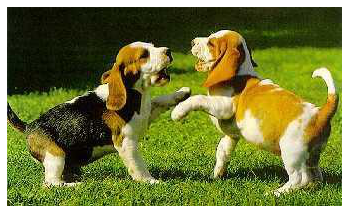

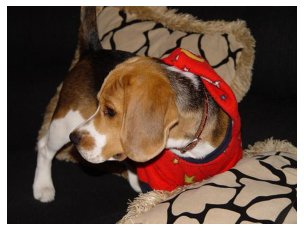

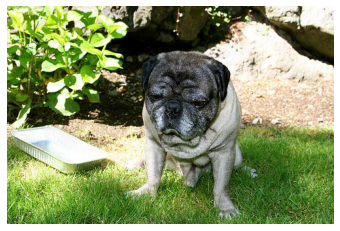

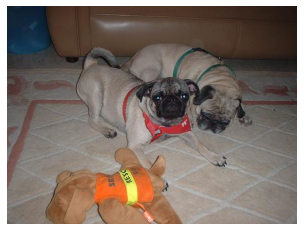

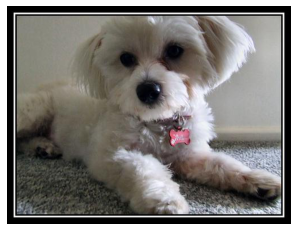

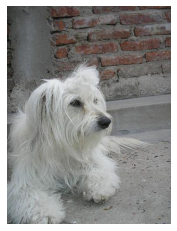

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

indeks = 3

i_beagle = [os.path.join(dir_beagle, fname) 
                for fname in file_beagle[indeks-2:indeks]]
i_pug = [os.path.join(dir_pug, fname) 
                for fname in file_pug[indeks-2:indeks]]
i_maltese = [os.path.join(dir_maltese, fname) 
                for fname in file_maltese[indeks-2:indeks]]


for i, j in enumerate(i_beagle+i_pug+i_maltese):
  gambar = mpimg.imread(j)
  plt.imshow(gambar)
  plt.axis('Off')
  plt.show()

# Dataset Augmentation



In [ ]:
dir_training = "train/"

#adding augmentation
training_datagen = ImageDataGenerator(
      rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

dir_validation = "test/"

validation_datagen = ImageDataGenerator(
      rescale=1./255.)

train_generator = training_datagen.flow_from_directory(
	dir_training,
	target_size=(300,300),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	dir_validation,
	target_size=(300,300),
	class_mode='categorical'
)


Found 1200 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


# Convolutional Neural Network


In [ ]:
# make the CNN model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
#train the model
model1.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
hist = model1.fit(train_generator, validation_data = validation_generator, epochs=10, steps_per_epoch=30, verbose = 1)

Epoch 1/10
30/30 [==============================] - 318s 10s/step - loss: 3.5007 - accuracy: 0.0985 - val_loss: 2.2994 - val_accuracy: 0.1233
Epoch 2/10
30/30 [==============================] - 67s 2s/step - loss: 2.3018 - accuracy: 0.1091 - val_loss: 2.2985 - val_accuracy: 0.1033
Epoch 3/10
30/30 [==============================] - 32s 1s/step - loss: 2.2953 - accuracy: 0.1240 - val_loss: 2.2727 - val_accuracy: 0.1300
Epoch 4/10
30/30 [==============================] - 25s 841ms/step - loss: 2.2967 - accuracy: 0.1049 - val_loss: 2.2967 - val_accuracy: 0.1433
Epoch 5/10
30/30 [==============================] - 24s 813ms/step - loss: 2.2895 - accuracy: 0.1282 - val_loss: 2.2558 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 24s 812ms/step - loss: 2.2665 - accuracy: 0.1600 - val_loss: 2.2443 - val_accuracy: 0.1533
Epoch 7/10
30/30 [==============================] - 25s 828ms/step - loss: 2.2573 - accuracy: 0.1531 - val_loss: 2.2355 - val_accuracy: 0.1733
Epoch 

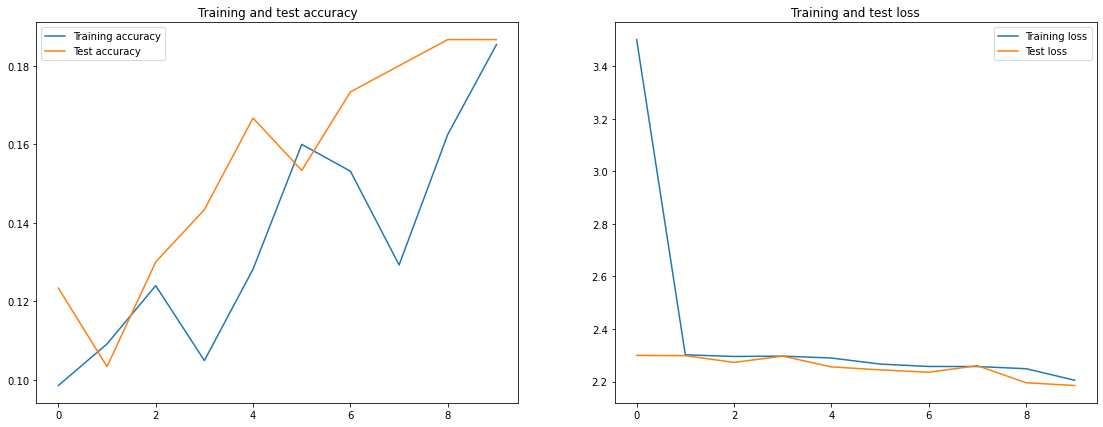

In [ ]:
#show the epoch graph
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(hist.epoch, hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(hist.epoch, hist.history['loss'], label='Training loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

# Transfer Learning with Xception


In [ ]:
#Import pre-trained Xception model to base_model
base_model = Xception(weights='imagenet', 
                      input_shape = (300,300,3), 
                      include_top=False,
                      pooling = 'avg')


#get the base_model output
last_output = base_model.output

In [ ]:
#Input some layer
x = Dropout(0.2)(last_output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model1 = Model(inputs=base_model.input, outputs=x)

In [ ]:
#defining callback to stop until reached acc you want
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    val_acc = logs["val_accuracy"]
    train_acc = logs["accuracy"]
    if val_acc > 0.92 and train_acc > 0.92:
      print("\n Accuracy already reached 94%, Stopping iteration...")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
#only train from 101st layer
for layer in model1.layers[:100]:
    layer.trainable = False
for layer in model1.layers[100:]:
    layer.trainable = True

model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

model1.summary()

hist1 = model1.fit(train_generator, validation_data = validation_generator, callbacks=[callbacks], epochs=100, steps_per_epoch=30,  verbose = 1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

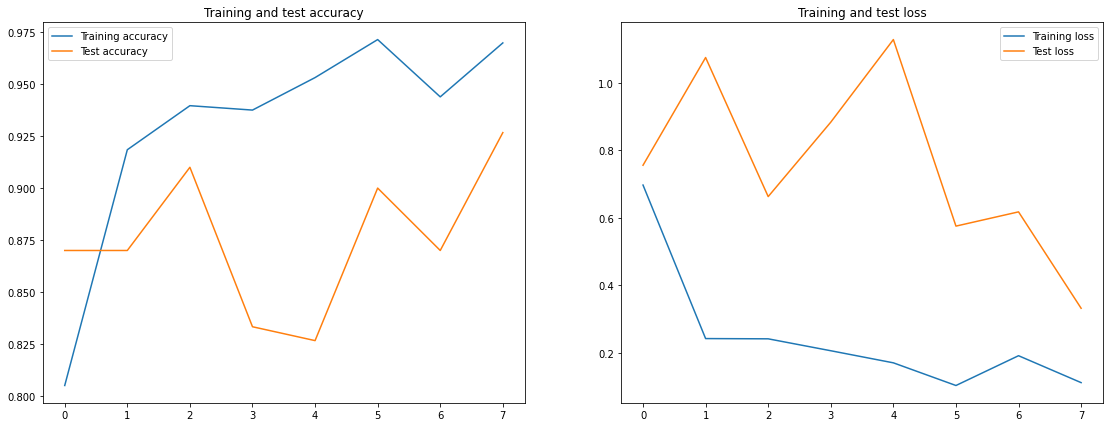

In [ ]:
#show the epoch graph
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(hist1.epoch, hist1.history['accuracy'], label='Training accuracy')
plt.plot(hist1.epoch, hist1.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(hist1.epoch, hist1.history['loss'], label='Training loss')
plt.plot(hist1.epoch, hist1.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

# Predicting images with Xception model

Saving puggg.jfif to puggg (39).jfif
Saving puggg.webp to puggg (27).webp
Saving puggggg.jfif to puggggg (26).jfif
Saving pugggggg.png to pugggggg (23).png


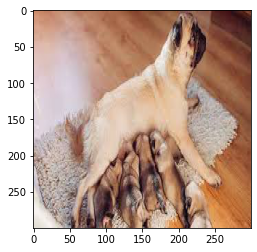

beagle: 0.00%
bull_mastiff: 0.01%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.98%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.99 seconds


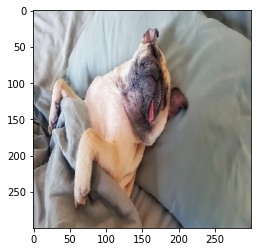

beagle: 0.01%
bull_mastiff: 39.33%
chihuahua: 0.19%
german_shepherd: 0.09%
golden_retriever: 0.02%
maltese: 0.02%
pomeranian: 0.05%
pug: 59.60%
shih_tzu: 0.01%
siberian_husky: 0.67%

pug detected, the probability is 60%
time execution: 0.05 seconds


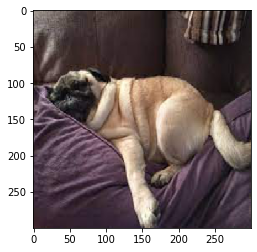

beagle: 0.00%
bull_mastiff: 68.50%
chihuahua: 0.01%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 31.39%
shih_tzu: 0.00%
siberian_husky: 0.10%

bull_mastiff detected, the probability is 68%
time execution: 0.05 seconds


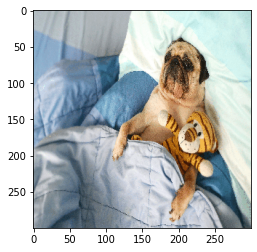

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 100.00%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.06 seconds


In [ ]:
labels = train_generator.class_indices.keys()

upload = files.upload()

for fn in upload.keys():
 
  #predict
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  # do your work here
  start_time = time.time()
  proba = model1.predict(images)[0]
  end_time = time.time()
  print
  plt.imshow(img)
  plt.show()
  prob=0
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    if p>prob:
      prob=p
      lab=label

  print()
  print("=====================================")
  print("{} detected, the probability is {:.0f}%".format(lab, prob*100))
  print("time execution: {:.2f} seconds".format(end_time - start_time))



# Transfer Learning with Inception



In [ ]:
#Import Xception pre-trained base model

base_model = InceptionV3(input_shape = (300, 300, 3), 
                                weights = 'imagenet',
                                include_top = False)

# Make all the layers to non-trainable
for layer in base_model.layers:
  layer.trainable = False

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_297 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_294 (Batch  (None, 149, 149, 32  96         ['conv2d_297[0][0]']             
 Normalization)                 )                                                      

In [ ]:
#get the start layer ('mixed9_0')
last_layer = base_model.get_layer('mixed9_0')
print('last layer output shape: ', last_layer.output_shape)
output = last_layer.output

last layer output shape:  (None, 8, 8, 768)


change : 512, 1024. mixed9_0 mixed8.

In [ ]:
#add some layer
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)   
#x = BatchNormalization()(last_output)
#x = GlobalAveragePooling2D()(x)               
x = Dense(10, activation='softmax')(x)           

model = Model(base_model.input, x) 

model.compile(optimizer = Adamax(lr=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_297 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_294 (Batch  (None, 149, 149, 32  96         ['conv2d_297[0][0]']             
 Normalization)                 )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


 batch_normalization_311 (Batch  (None, 35, 35, 96)  288         ['conv2d_314[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_312 (Batch  (None, 35, 35, 64)  192         ['conv2d_315[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_294 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_306[0][0]']
                                                                                                  
 activation_296 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_308[0][0]']
                                                                                                  
 activatio

In [ ]:

#defining callback to stop until reached acc you want
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    val_acc = logs["val_accuracy"]
    train_acc = logs["accuracy"]
    if val_acc > 0.94 and train_acc > 0.94:
      print("\n Accuracy already reached 94%, Stopping iteration...")
      self.model.stop_training = True

callbacks = myCallback()

tried:


*   Adamax 10 epoch 96 92
*   adamax lr 0.001 91 94, max val 92
*   Adamax lr 0.01 XXXXX lr 0.001 better
*   List item



*   adam 91 92
*   adam lr 0.001 93 92




In [ ]:
#train the model
model2 = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[callbacks])

Epoch 1/50
38/38 [==============================] - 35s 829ms/step - loss: 0.9580 - accuracy: 0.7125 - val_loss: 0.2645 - val_accuracy: 0.9200
Epoch 2/50
38/38 [==============================] - 30s 800ms/step - loss: 0.3169 - accuracy: 0.8983 - val_loss: 0.2405 - val_accuracy: 0.9167
Epoch 3/50
38/38 [==============================] - 31s 827ms/step - loss: 0.2491 - accuracy: 0.9167 - val_loss: 0.2033 - val_accuracy: 0.9300
Epoch 4/50
38/38 [==============================] - 30s 790ms/step - loss: 0.2210 - accuracy: 0.9275 - val_loss: 0.1609 - val_accuracy: 0.9367
Epoch 5/50
38/38 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9425
 Accuracy already reached 94%, Stopping iteration...
38/38 [==============================] - 30s 791ms/step - loss: 0.1711 - accuracy: 0.9425 - val_loss: 0.1691 - val_accuracy: 0.9433


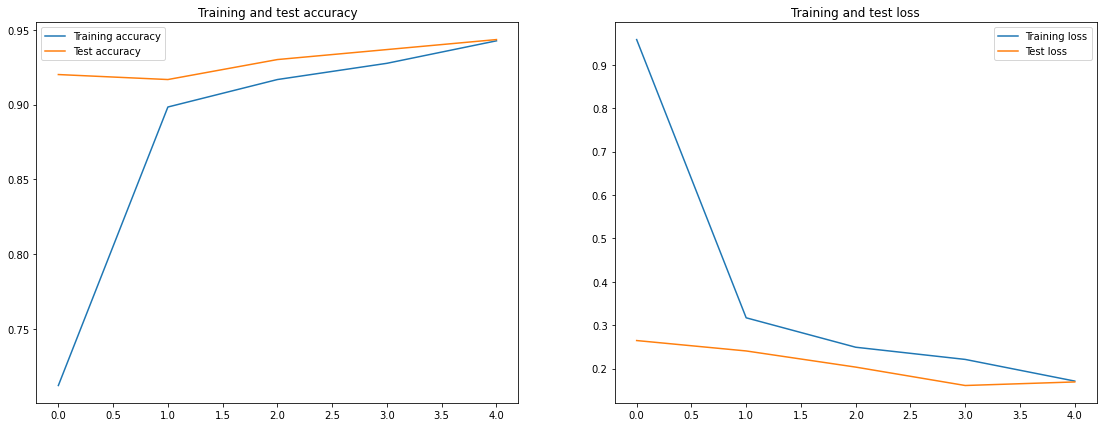

In [ ]:
#show the epoch graph
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(model2.epoch, model2.history['accuracy'], label='Training accuracy')
plt.plot(model2.epoch, model2.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(model2.epoch, model2.history['loss'], label='Training loss')
plt.plot(model2.epoch, model2.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

# Predicting new images with Inception

Saving maltese2.jpg to maltese2 (24).jpg
Saving maltese3.jpg to maltese3 (26).jpg
Saving maltese4.jpg to maltese4 (28).jpg
Saving maltesew.jfif to maltesew (21).jfif
Saving pom3.jfif to pom3 (20).jfif
Saving pu1212g.jpg to pu1212g (30).jpg
Saving pug.jfif to pug (24).jfif
Saving pug.jpg to pug (31).jpg
Saving pug.png to pug (29).png
Saving pug2.jfif to pug2 (24).jfif
Saving pug112.jpg to pug112 (13).jpg
Saving pugaaa.webp to pugaaa (13).webp
Saving pugg.jpg to pugg (24).jpg


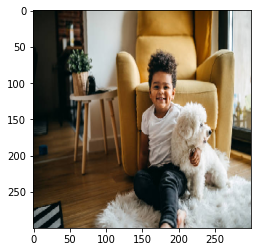

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 88.61%
pomeranian: 1.64%
pug: 0.00%
shih_tzu: 9.70%
siberian_husky: 0.04%

maltese detected, the probability is 89%
time execution: 0.06 seconds


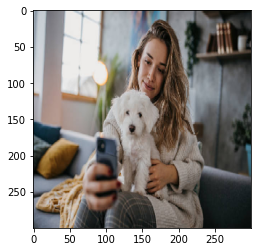

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 99.95%
pomeranian: 0.04%
pug: 0.00%
shih_tzu: 0.01%
siberian_husky: 0.00%

maltese detected, the probability is 100%
time execution: 0.06 seconds


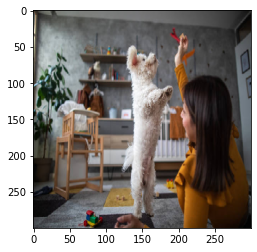

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.03%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 98.41%
pomeranian: 0.02%
pug: 0.00%
shih_tzu: 1.54%
siberian_husky: 0.00%

maltese detected, the probability is 98%
time execution: 0.06 seconds


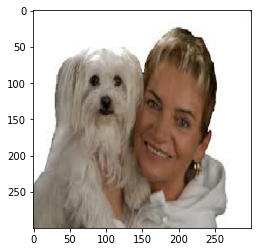

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 100.00%
pomeranian: 0.00%
pug: 0.00%
shih_tzu: 0.00%
siberian_husky: 0.00%

maltese detected, the probability is 100%
time execution: 0.07 seconds


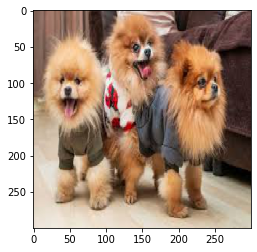

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.01%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 99.99%
pug: 0.00%
shih_tzu: 0.00%
siberian_husky: 0.00%

pomeranian detected, the probability is 100%
time execution: 0.06 seconds


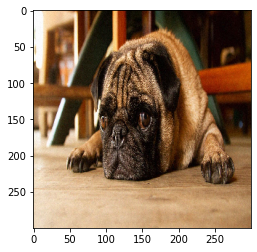

beagle: 0.00%
bull_mastiff: 77.12%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 22.88%
shih_tzu: 0.00%
siberian_husky: 0.00%

bull_mastiff detected, the probability is 77%
time execution: 0.06 seconds


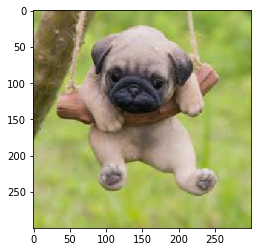

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 100.00%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.07 seconds


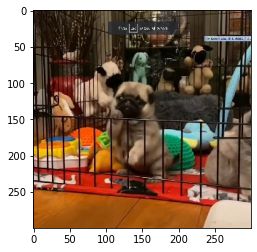

beagle: 0.00%
bull_mastiff: 0.00%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.99%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.06 seconds


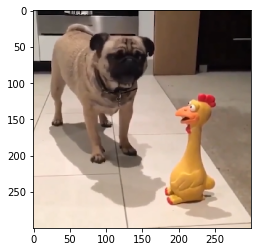

beagle: 0.00%
bull_mastiff: 16.03%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 83.96%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 84%
time execution: 0.06 seconds


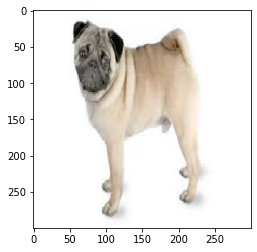

beagle: 0.00%
bull_mastiff: 0.15%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.85%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.07 seconds


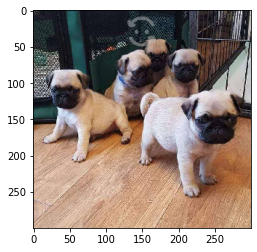

beagle: 0.00%
bull_mastiff: 0.11%
chihuahua: 0.00%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.89%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.06 seconds


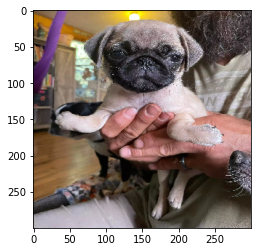

beagle: 0.00%
bull_mastiff: 0.01%
chihuahua: 0.04%
german_shepherd: 0.00%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.94%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.06 seconds


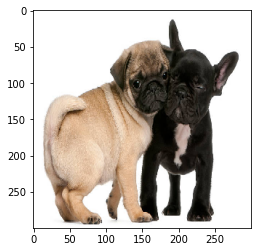

beagle: 0.00%
bull_mastiff: 0.14%
chihuahua: 0.08%
german_shepherd: 0.01%
golden_retriever: 0.00%
maltese: 0.00%
pomeranian: 0.00%
pug: 99.77%
shih_tzu: 0.00%
siberian_husky: 0.00%

pug detected, the probability is 100%
time execution: 0.06 seconds


In [ ]:
labels = train_generator.class_indices.keys()

upload = files.upload()

for fn in upload.keys():
 
  #predict
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  # do your work here
  start_time = time.time()
  proba = model.predict(images)[0]
  end_time = time.time()
  print
  plt.imshow(img)
  plt.show()
  prob=0
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    if p>prob:
      prob=p
      lab=label

  print()
  print("=====================================")
  print("{} detected, the probability is {:.0f}%".format(lab, prob*100))
  print("time execution: {:.2f} seconds".format(end_time - start_time))



In [ ]:
#save model
model.save("IncDogBreed.h5")

In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1hMuDgvtpzym6CqARviPEekGIXePALmsz/dogs breed


In [ ]:
model.save('tmp/IncDogBreed.h5')

In [ ]:
import shutil
shutil.copy('IncDogBreed.h5','/content/gdrive/.shortcut-targets-by-id/1hMuDgvtpzym6CqARviPEekGIXePALmsz/dogs breed/assets')

'/content/gdrive/.shortcut-targets-by-id/1hMuDgvtpzym6CqARviPEekGIXePALmsz/dogs breed/assets/IncDogBreed.h5'

In [ ]:
files.download('IncDogBreed.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>